In [2]:
import cv2 # OpenCV
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import multiprocessing
import os


2023-07-13 08:56:28.684624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 08:56:28.819618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 08:56:28.820428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 08:56:29.646808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
num_cores = multiprocessing.cpu_count()
config = tf.compat.v1.ConfigProto(inter_op_parallelism_threads=num_cores,
                                  intra_op_parallelism_threads=num_cores)
tf.compat.v1.Session(config=config)


In [8]:
diretorio_principal = '/home/emanoelcepr/projetos/u-net/dados/'  # Substitua pelo caminho do diretório principal

# Iterar sobre as pastas no diretório principal
for pasta in os.listdir(diretorio_principal):
    caminho_pasta = os.path.join(diretorio_principal, pasta)  # Obter o caminho completo da pasta
    
    if os.path.isdir(caminho_pasta):  # Verificar se é um diretório
        caminho_images = os.path.join(caminho_pasta, 'images')  # Obter o caminho do diretório "images" dentro da pasta
        
        if os.path.isdir(caminho_images):  # Verificar se o diretório "images" existe
            for arquivo in os.listdir(caminho_images):
                if 'B12_(Raw)' in arquivo:  # Verificar se o nome do arquivo contém "B12_(Raw)"
                    caminho_arquivo = os.path.join(caminho_images, arquivo)  # Obter o caminho completo do arquivo

                    # Ler a imagem
                    img = cv2.imread(caminho_arquivo)

                    # Converter para escala de cinza
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Aplicar o limiar
                    limiar = 100
                    _, thresh = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)

                    # Salvar a imagem binarizada na pasta "mask"
                    caminho_mask = os.path.join(caminho_pasta, 'mask')
                    novo_nome = arquivo.replace('B12_(Raw)', 'Mask')
                    caminho_saida = os.path.join(caminho_mask, novo_nome)
                    cv2.imwrite(caminho_saida, thresh)

                    # Exibir a imagem após o limiar
                    plt.imshow(thresh, cmap='gray')
                    plt.show()
                    break  # Parar a iteração após encontrar o arquivo correto


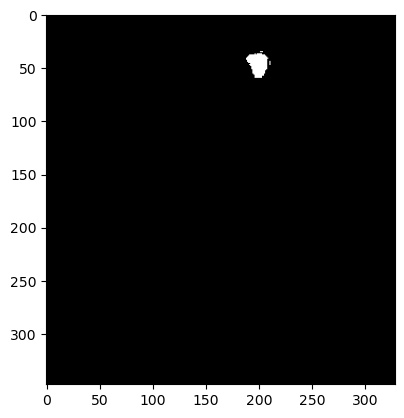

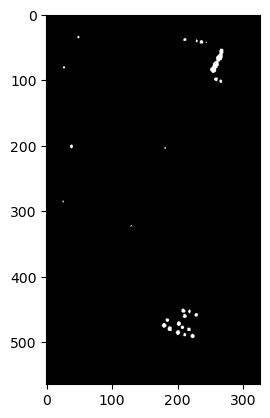

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

diretorio = '/home/emanoelcepr/projetos/u-net/dados/'  # Substitua pelo caminho da pasta onde estão localizadas as imagens

# Iterar sobre os arquivos na pasta
for arquivo in os.listdir(diretorio):
    if 'B12_(Raw)' in arquivo:  # Verificar se o nome do arquivo contém "B12_(Raw)"
        caminho_arquivo = os.path.join(diretorio, arquivo)  # Obter o caminho completo do arquivo

        # Ler a imagem
        img = cv2.imread(caminho_arquivo)

        # Converter para escala de cinza
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Aplicar o limiar
        limiar = 100
        _, thresh = cv2.threshold(gray, limiar, 1, cv2.THRESH_BINARY)

        # Salvar a imagem binarizada
        novo_nome = arquivo.replace('B12_(Raw)', 'Mask')
        caminho_saida = os.path.join(diretorio, novo_nome)
        cv2.imwrite(caminho_saida, thresh)

        # Exibir a imagem após o limiar
        plt.imshow(thresh, cmap='gray')
        plt.show()
